In [2]:
import pandas as pd
import os
import glob

In [3]:
# Define legend categories
legend_categories = {
    'Assault': ['Bangalore', 'Fuse', 'Ash', 'Mad Maggie', 'Ballistic'],
    'Skirmisher': ['Pathfinder', 'Wraith', 'Octane', 'Revenant', 'Horizon', 'Valkyrie','Alter'],
    'Recon': ['Bloodhound', 'Crypto', 'Seer', 'Vantage'],
    'Support': ['Gibraltar', 'Lifeline', 'Mirage', 'Loba', 'Newcastle', 'Conduit'],
    'Controller': ['Caustic', 'Wattson', 'Rampart', 'Catalyst']
}

In [4]:
# Flatten the dictionary to map legend to category
legend_to_category = {}
for category, legends in legend_categories.items():
    for legend in legends:
        legend_to_category[legend] = category


In [5]:
base_path = r'C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\New Data For Legends'

damage_path = os.path.join(base_path, 'Legend Damage')
kills_path = os.path.join(base_path, 'Legend Kills')
matches_path = os.path.join(base_path, 'Legend Matches Played')
wins_path = os.path.join(base_path, 'Legend Wins')
# Function to list files in a directory
def list_files(directory):
    print(f"Files in {directory}:")
    for f in os.listdir(directory):
        print(f)

# List files in each directory
list_files(damage_path)
list_files(kills_path)
list_files(matches_path)
list_files(wins_path)

Files in C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\New Data For Legends\Legend Damage:
Alter_damage.csv
Ash_damage.csv
Ballistic_damage.csv
Bangalore_damage.csv
Bloodhound_damage.csv
Catalyst_damage.csv
Caustic_damage.csv
Conduit_damage.csv
Crypto_damage.csv
Fuse_damage.csv
Gibraltar_damage.csv
Horizon_damage.csv
Lifeline_damage.csv
Loba_damage.csv
Mad Maggie_damage.csv
Mirage_damage.csv
Newcastle_damage.csv
Octane_damage.csv
Pathfinder_damage.csv
Rampart_damage.csv
Revenant_damage.csv
Seer_damage.csv
Valkyrie_damage.csv
Vantage_damage.csv
Wattson_damage.csv
Wraith_damage.csv
Files in C:\Users\altaa\Documents\GitHub\Apex-Legends-Research\New Data For Legends\Legend Kills:
Alter_kills.csv
Ash_kills.csv
Ballistic_kills.csv
Bangalore_kills.csv
Bloodhound_kills.csv
Catalyst_kills.csv
Caustic_kills.csv
Conduit_kills.csv
Crypto_kills.csv
Fuse_kills.csv
Gibraltar_kills.csv
Horizon_kills.csv
Lifeline_kills.csv
Loba_kills.csv
Mad Maggie_kills.csv
Mirage_kills.csv
Newcastle_kills.csv

In [6]:
# Initialize an empty list to hold dataframes for each legend
legend_dataframes = []

# Get list of legends
legends = list(legend_to_category.keys())

In [7]:
#Loop over each legend
for legend in legends:
    try:
        # Build file paths for the legend
        legend_damage_file = os.path.join(damage_path, f"{legend}_damage.csv")
        legend_kills_file = os.path.join(kills_path, f"{legend}_kills.csv")
        legend_matches_file = os.path.join(matches_path, f"{legend}_games_played.csv")  # Updated suffix
        legend_wins_file = os.path.join(wins_path, f"{legend}_wins.csv")
        
        # Check if all files exist
        required_files = [legend_damage_file, legend_kills_file, legend_matches_file, legend_wins_file]
        missing_files = [f for f in required_files if not os.path.exists(f)]
        if missing_files:
            print(f"Data files for legend '{legend}' are missing: {missing_files}. Skipping this legend.")
            continue  # Skip to the next legend if any file is missing
        
        # Read the data files
        df_damage = pd.read_csv(legend_damage_file, header=None, names=['Damage'], skiprows=1)
        df_matches = pd.read_csv(legend_matches_file, header=None, names=['Games Played'], skiprows=1)
        df_wins = pd.read_csv(legend_wins_file, header=None, names=['Wins'], skiprows=1)

        # Custom converter to handle numeric values and ignore non-numeric ones
        def convert_number(s):
            try:
                # Remove commas and quotes, then convert to integer
                return int(str(s).replace(',', '').replace('"', '').strip())
            except ValueError:
                # Return NaN if conversion fails
                return pd.NA

        # Read the kills CSV file with the custom converter
        df_kills = pd.read_csv(legend_kills_file, header=None, names=['Kills'], converters={0: convert_number}, skiprows=1)

        # Combine the data into a single DataFrame, aligning on index (axis=1)
        df_legend = pd.concat([df_damage.reset_index(drop=True), 
                               df_kills.reset_index(drop=True), 
                               df_matches.reset_index(drop=True), 
                               df_wins.reset_index(drop=True)], axis=1)

        # Add 'legend_name' column to identify the legend in the combined DataFrame
        df_legend['legend_name'] = legend

        # Append the processed DataFrame to the list
        legend_dataframes.append(df_legend)
    
    except Exception as e:
        # Catch any exceptions during processing and print the error
        print(f"An error occurred while processing legend '{legend}': {e}")

In [8]:
# Concatenate all legend dataframes
all_legends_df = pd.concat(legend_dataframes, ignore_index=True)
# Map legends to categories
all_legends_df['Legend_Category'] = all_legends_df['legend_name'].map(legend_to_category)
# # List of legends with missing Wins data
legends_missing_wins = ['Ballistic', 'Conduit', 'Alter', 'Newcastle']
# Filter out legends with missing Wins data
all_legends_df = all_legends_df[~all_legends_df['legend_name'].isin(legends_missing_wins)]
print(all_legends_df)

           Damage   Kills  Games Played   Wins legend_name Legend_Category
0      1335473024  192425         47418  15355   Bangalore         Assault
1        50500034  177520         35645  14088   Bangalore         Assault
2        48186631  172382         32770  13041   Bangalore         Assault
3        45909908  170902         30597  12675   Bangalore         Assault
4        45231990  168326         28659  12637   Bangalore         Assault
...           ...     ...           ...    ...         ...             ...
12995     1752140    6767           997    151    Catalyst      Controller
12996     1751077    6740           994    150    Catalyst      Controller
12997     1750218    6740           990    150    Catalyst      Controller
12998     1749964    6737           990    150    Catalyst      Controller
12999     1749508    6718           988    150    Catalyst      Controller

[11000 rows x 6 columns]


In [9]:
# Ensure that columns are numeric, forcing invalid values to NaN
all_legends_df['Kills'] = pd.to_numeric(all_legends_df['Kills'], errors='coerce')
all_legends_df['Wins'] = pd.to_numeric(all_legends_df['Wins'], errors='coerce')
all_legends_df['Games Played'] = pd.to_numeric(all_legends_df['Games Played'], errors='coerce')
all_legends_df['Damage'] = pd.to_numeric(all_legends_df['Damage'], errors='coerce')

# Avoid division by zero and handle NaN
all_legends_df['Kills_per_Win'] = all_legends_df.apply(lambda row: row['Kills'] / row['Wins'] if pd.notna(row['Wins']) and row['Wins'] > 0 else 0, axis=1)
all_legends_df['Kills_per_Match'] = all_legends_df.apply(lambda row: row['Kills'] / row['Games Played'] if pd.notna(row['Games Played']) and row['Games Played'] > 0 else 0, axis=1)
all_legends_df['Damage_per_Match'] = all_legends_df.apply(lambda row: row['Damage'] / row['Games Played'] if pd.notna(row['Games Played']) and row['Games Played'] > 0 else 0, axis=1)

# Group by 'Legend_Category' and calculate the mean of the relevant columns
averaged_stats_df = all_legends_df.groupby('Legend_Category').agg(
    Average_Kills_per_Win=('Kills_per_Win', 'mean'),
    Average_Kills_per_Match=('Kills_per_Match', 'mean'),
    Average_Damage_per_Match=('Damage_per_Match', 'mean')
).reset_index()

# Display the aggregated statistics
print(averaged_stats_df)

  Legend_Category  Average_Kills_per_Win  Average_Kills_per_Match  \
0         Assault              20.182228                 5.317327   
1      Controller              24.195288                 5.117616   
2           Recon              19.728249                 4.704346   
3      Skirmisher              18.516093                 5.040864   
4         Support              16.389824                 4.985961   

   Average_Damage_per_Match  
0               1591.832099  
1               1467.854745  
2               1444.803915  
3               1349.504830  
4               1400.111576  


# When it comes to wins Alter, Ballistic, Conduit and Newcastle do not have data of their wins. So we can't use them to calculate the win rate.

C:\Users\altaa\AppData\Local\Temp\ipykernel_10928\3149221696.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Legend_Category', y='Average_Kills_per_Win', data=averaged_stats_df, palette='Blues_d')


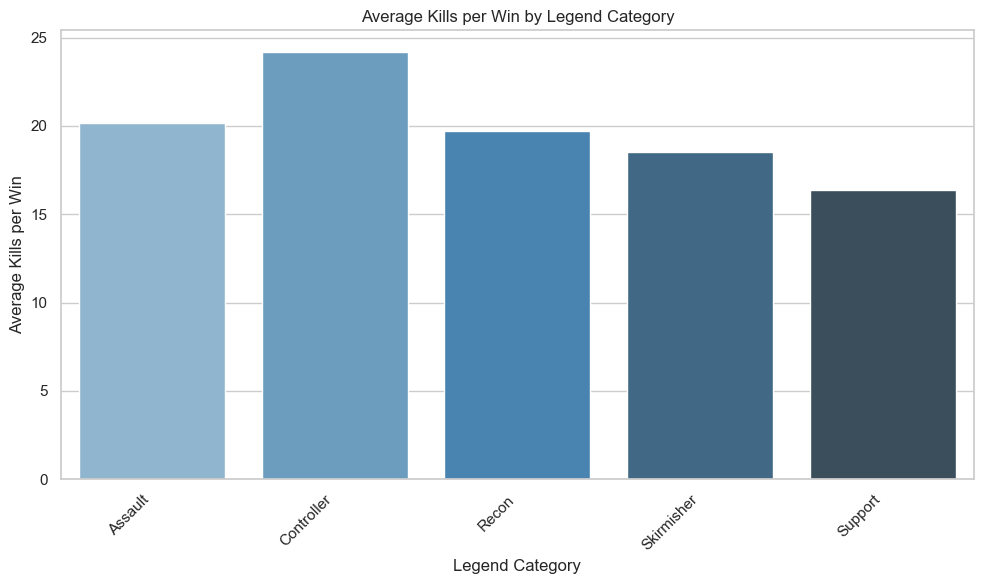

C:\Users\altaa\AppData\Local\Temp\ipykernel_10928\3149221696.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Legend_Category', y='Average_Kills_per_Match', data=averaged_stats_df, palette='Oranges_d')


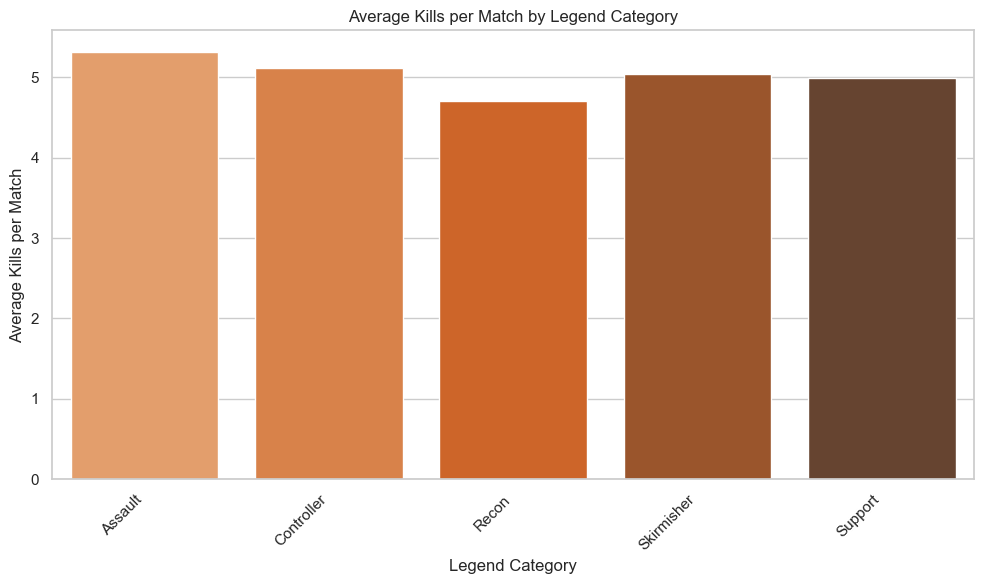

C:\Users\altaa\AppData\Local\Temp\ipykernel_10928\3149221696.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Legend_Category', y='Average_Damage_per_Match', data=averaged_stats_df, palette='Greens_d')


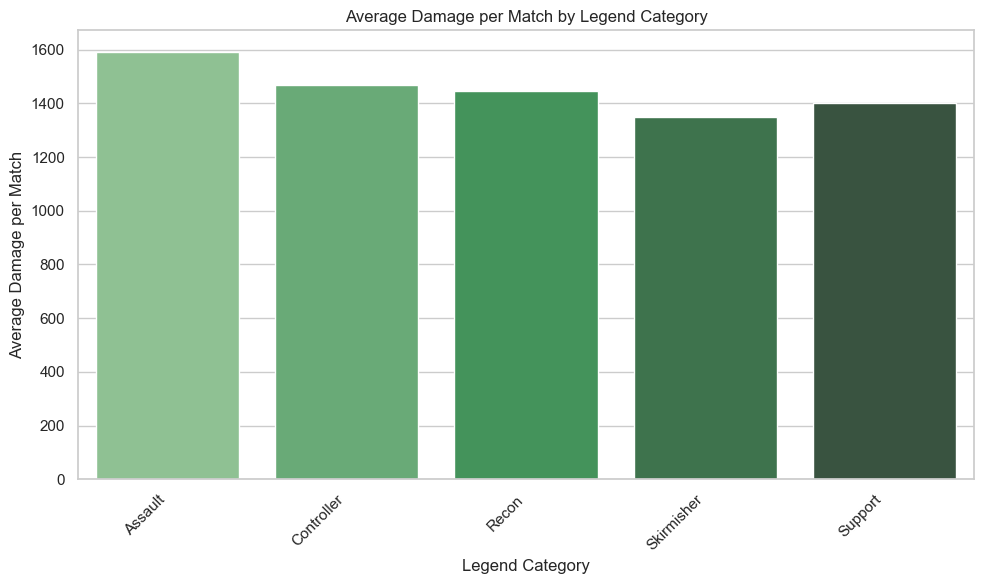

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Plot 1: Average Kills per Win by Legend Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Legend_Category', y='Average_Kills_per_Win', data=averaged_stats_df, palette='Blues_d')
plt.title('Average Kills per Win by Legend Category')
plt.xlabel('Legend Category')
plt.ylabel('Average Kills per Win')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot 2: Average Kills per Match by Legend Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Legend_Category', y='Average_Kills_per_Match', data=averaged_stats_df, palette='Oranges_d')
plt.title('Average Kills per Match by Legend Category')
plt.xlabel('Legend Category')
plt.ylabel('Average Kills per Match')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot 3: Average Damage per Match by Legend Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Legend_Category', y='Average_Damage_per_Match', data=averaged_stats_df, palette='Greens_d')
plt.title('Average Damage per Match by Legend Category')
plt.xlabel('Legend Category')
plt.ylabel('Average Damage per Match')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [3]:
# List of legends with missing Wins data
legends_missing_wins = ['Ballistic', 'Conduit', 'Alter', 'Newcastle']

# Filter out these legends from the main DataFrame
filtered_legends_df = all_legends_df[~all_legends_df['legend_name'].isin(legends_missing_wins)]

# Verify the exclusion
print(filtered_legends_df['legend_name'].unique())


NameError: name 'all_legends_df' is not defined

# Kruskal-Wallis test is a non-parametric test that is used to determine if there are statistically significant differences between the medians of three or more independent groups. It is the non-parametric version of the one-way ANOVA test.

In [12]:
from scipy import stats

# Groups for Kills per Match
groups_kpm_filtered = [group['Kills_per_Match'].dropna().values for name, group in filtered_legends_df.groupby('Legend_Category')]

# Kruskal-Wallis Test for Kills per Match
stat_kpm_filtered, p_kpm_filtered = stats.kruskal(*groups_kpm_filtered)
print(f"Kruskal-Wallis Test for Kills per Match: Stat={stat_kpm_filtered}, p-value={p_kpm_filtered}")

# Groups for Kills per Win
groups_kpw_filtered = [group['Kills_per_Win'].dropna().values for name, group in filtered_legends_df.groupby('Legend_Category')]

# Kruskal-Wallis Test for Kills per Win
stat_kpw_filtered, p_kpw_filtered = stats.kruskal(*groups_kpw_filtered)
print(f"Kruskal-Wallis Test for Kills per Win: Stat={stat_kpw_filtered}, p-value={p_kpw_filtered}")


Kruskal-Wallis Test for Kills per Match: Stat=568.5255556788975, p-value=1.003435082218583e-121
Kruskal-Wallis Test for Kills per Win: Stat=3098.5248287582763, p-value=0.0


# Dunn's Test is a post-hoc test that is used to determine which groups are significantly different from each other. It is used after the Kruskal-Wallis test.

In [13]:
import scikit_posthocs as sp

# Dunn's Test for Kills per Match
dunn_kpm_filtered = sp.posthoc_dunn(filtered_legends_df, val_col='Kills_per_Match', group_col='Legend_Category', p_adjust='bonferroni')
print("Dunn's Test for Kills per Match:")
print(dunn_kpm_filtered)

# Dunn's Test for Kills per Win
dunn_kpw_filtered = sp.posthoc_dunn(filtered_legends_df, val_col='Kills_per_Win', group_col='Legend_Category', p_adjust='bonferroni')
print("\nDunn's Test for Kills per Win:")
print(dunn_kpw_filtered)


Dunn's Test for Kills per Match:
                  Assault    Controller          Recon    Skirmisher  \
Assault      1.000000e+00  4.160192e-43  8.999770e-123  6.831698e-40   
Controller   4.160192e-43  1.000000e+00   2.215555e-21  6.166728e-01   
Recon       8.999770e-123  2.215555e-21   1.000000e+00  5.189113e-35   
Skirmisher   6.831698e-40  6.166728e-01   5.189113e-35  1.000000e+00   
Support      5.819940e-28  5.751431e-02   8.150931e-35  1.000000e+00   

                 Support  
Assault     5.819940e-28  
Controller  5.751431e-02  
Recon       8.150931e-35  
Skirmisher  1.000000e+00  
Support     1.000000e+00  

Dunn's Test for Kills per Win:
                 Assault     Controller         Recon     Skirmisher  \
Assault     1.000000e+00   1.069603e-10  3.275983e-05   1.113335e-79   
Controller  1.069603e-10   1.000000e+00  2.364442e-29  2.270456e-153   
Recon       3.275983e-05   2.364442e-29  1.000000e+00   4.429270e-43   
Skirmisher  1.113335e-79  2.270456e-153  4.429270e-4

C:\Users\altaa\AppData\Local\Temp\ipykernel_10928\3635309910.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Legend_Category', y='Average_Kills_per_Match', data=averaged_stats_df_filtered,
C:\Users\altaa\AppData\Local\Temp\ipykernel_10928\3635309910.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Legend_Category', y='Average_Kills_per_Match', data=averaged_stats_df_filtered,


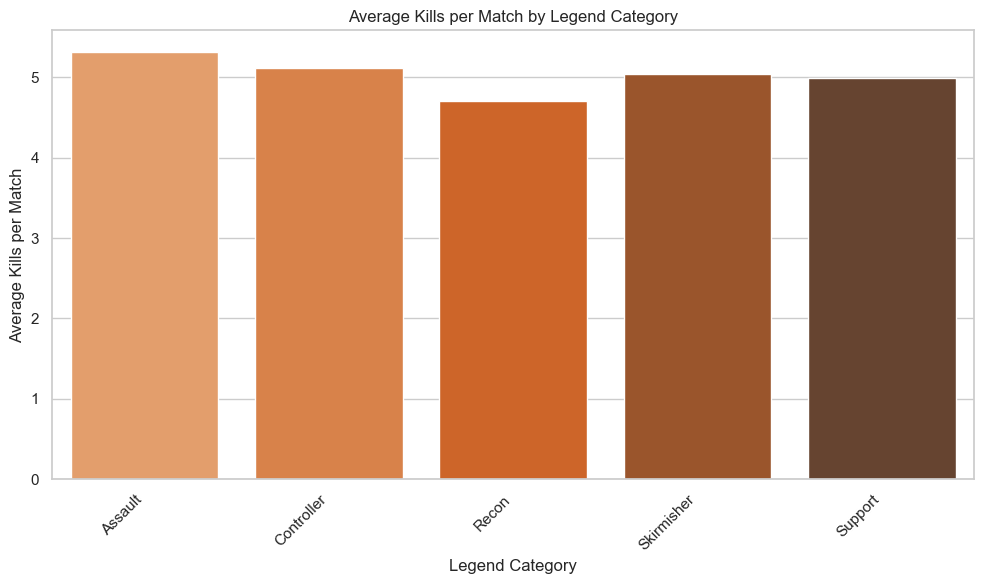

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate means and standard deviations for filtered data
averaged_stats_df_filtered = filtered_legends_df.groupby('Legend_Category').agg(
    Average_Kills_per_Match=('Kills_per_Match', 'mean'),
    Std_Kills_per_Match=('Kills_per_Match', 'std')
).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Legend_Category', y='Average_Kills_per_Match', data=averaged_stats_df_filtered,
            palette='Oranges_d', ci='sd')
plt.title('Average Kills per Match by Legend Category')
plt.xlabel('Legend Category')
plt.ylabel('Average Kills per Match')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\altaa\AppData\Local\Temp\ipykernel_10928\982253815.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Legend_Category', y='Kills_per_Match', data=filtered_legends_df, palette='Set3')


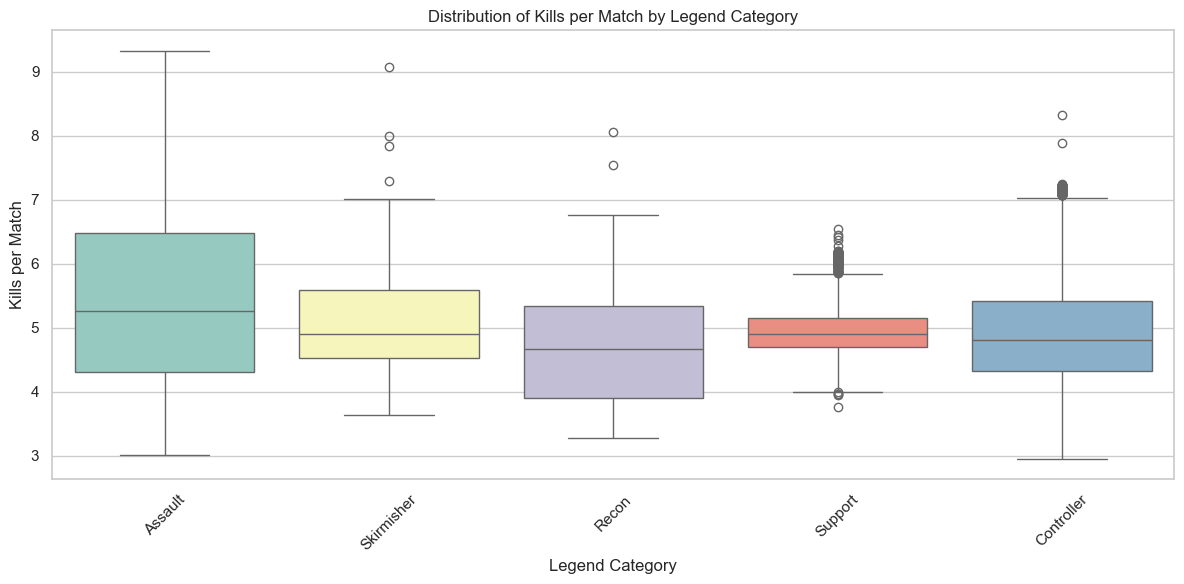

C:\Users\altaa\AppData\Local\Temp\ipykernel_10928\982253815.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Legend_Category', y='Kills_per_Win', data=filtered_legends_df, palette='Set2', inner='quartile')


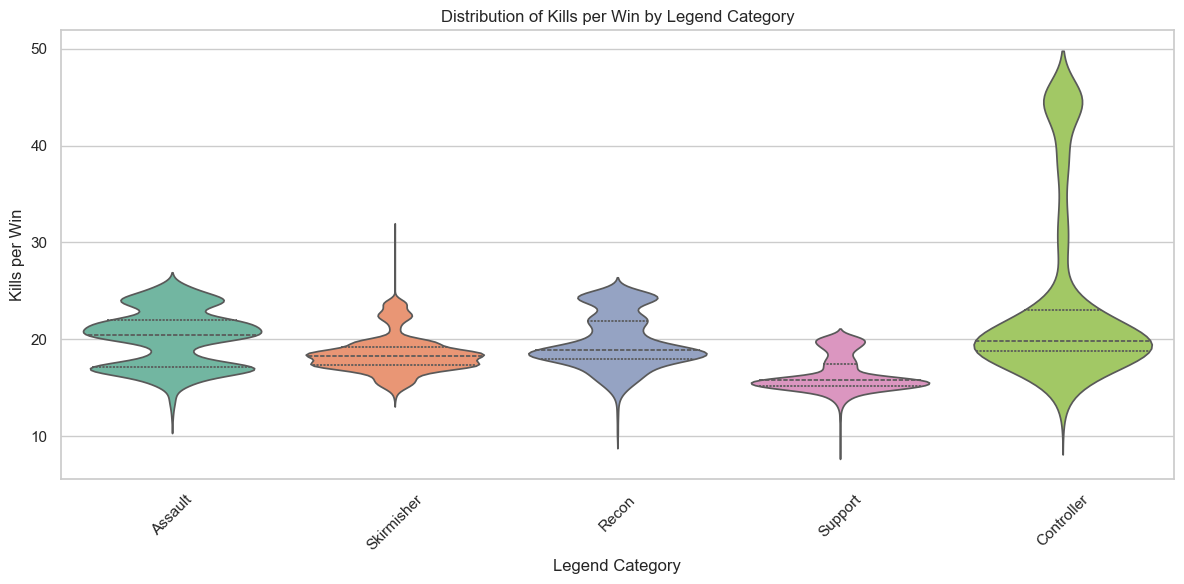

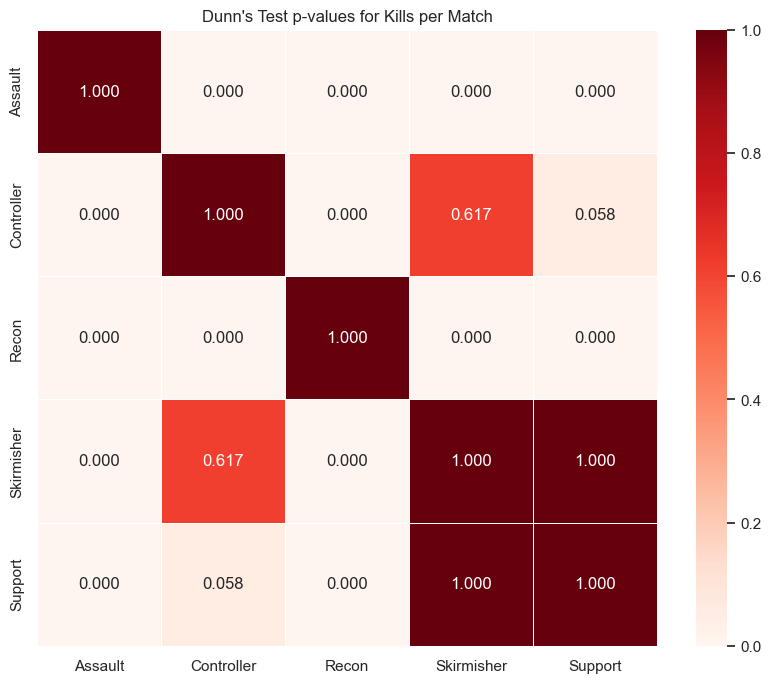

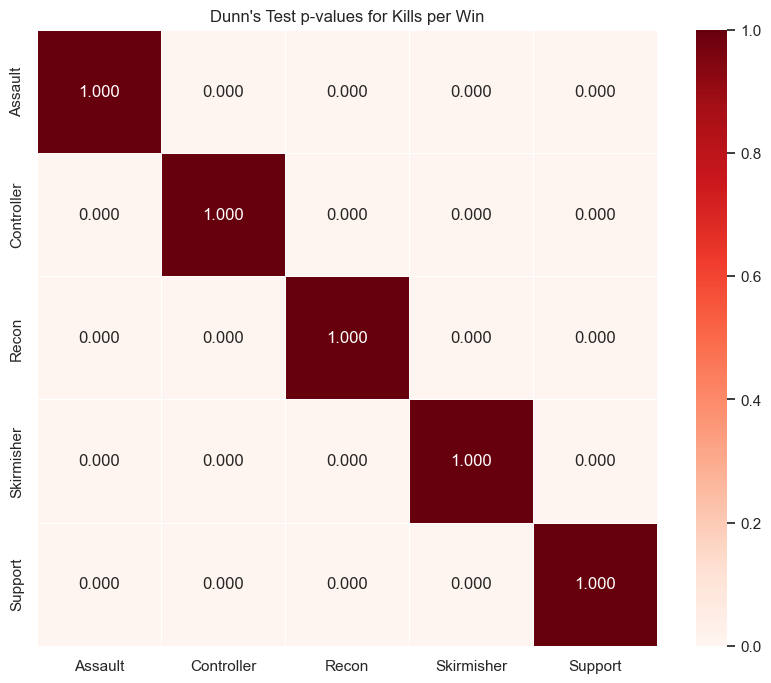

ValueError: Could not interpret value `Cluster` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1200x800 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot for Kills per Match
plt.figure(figsize=(12, 6))
sns.boxplot(x='Legend_Category', y='Kills_per_Match', data=filtered_legends_df, palette='Set3')
plt.title('Distribution of Kills per Match by Legend Category')
plt.xlabel('Legend Category')
plt.ylabel('Kills per Match')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Violin Plot for Kills per Win
plt.figure(figsize=(12, 6))
sns.violinplot(x='Legend_Category', y='Kills_per_Win', data=filtered_legends_df, palette='Set2', inner='quartile')
plt.title('Distribution of Kills per Win by Legend Category')
plt.xlabel('Legend Category')
plt.ylabel('Kills per Win')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap for Dunn's Test p-values for Kills per Match
plt.figure(figsize=(10, 8))
sns.heatmap(dunn_kpm_filtered, annot=True, cmap='Reds', fmt=".3f", linewidths=.5)
plt.title("Dunn's Test p-values for Kills per Match")
plt.show()

# Heatmap for Dunn's Test p-values for Kills per Win
plt.figure(figsize=(10, 8))
sns.heatmap(dunn_kpw_filtered, annot=True, cmap='Reds', fmt=".3f", linewidths=.5)
plt.title("Dunn's Test p-values for Kills per Win")
plt.show()

# Scatter Plot with Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Kills_per_Match', y='Kills_per_Win', hue='Cluster', data=filtered_legends_df, palette='Set1', s=100)
plt.title('Clusters of Legends Based on Kills per Match and Kills per Win')
plt.xlabel('Kills per Match')
plt.ylabel('Kills per Win')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


# Cliff's Delta for Non-Parametric Data: It is a measure of effect size that is used to determine the magnitude of the difference between two groups. It is used after the Kruskal-Wallis test.

In [134]:
import pandas as pd
from itertools import combinations

# Assuming filtered_legends_df is already defined
legend_categories = filtered_legends_df['Legend_Category'].unique()

# Initialize a list to store each row as a dictionary
delta_results_kpm_list = []

for group1, group2 in combinations(legend_categories, 2):
    lst1 = filtered_legends_df[filtered_legends_df['Legend_Category'] == group1]['Kills_per_Match']
    lst2 = filtered_legends_df[filtered_legends_df['Legend_Category'] == group2]['Kills_per_Match']
    delta = cliffs_delta(lst1.values, lst2.values)
    
    # Append the result as a dictionary
    delta_results_kpm_list.append({
        'Group1': group1,
        'Group2': group2,
        'Cliffs_Delta': delta
    })

# Create the DataFrame once after the loop
delta_results_kpm = pd.DataFrame(delta_results_kpm_list)

print("Cliff's Delta for Kills per Match:")
print(delta_results_kpm)


Cliff's Delta for Kills per Match:
       Group1      Group2  Cliffs_Delta
0     Assault  Skirmisher      0.279271
1     Assault       Recon      0.333937
2     Assault     Support      0.324706
3     Assault  Controller      0.147510
4  Skirmisher       Recon      0.237447
5  Skirmisher     Support     -0.041770
6  Skirmisher  Controller      0.081096
7       Recon     Support     -0.265402
8       Recon  Controller     -0.195522
9     Support  Controller      0.100170


In [136]:
delta_results_kpw_list = []
# Iterate over all unique pairs of legend categories
for group1, group2 in combinations(legend_categories, 2):
    # Extract the 'Kills_per_Win' data for each group
    lst1 = filtered_legends_df[filtered_legends_df['Legend_Category'] == group1]['Kills_per_Win']
    lst2 = filtered_legends_df[filtered_legends_df['Legend_Category'] == group2]['Kills_per_Win']
    
    # Calculate Cliff's Delta
    delta = cliffs_delta(lst1.values, lst2.values)
    
    # Append the result as a dictionary to the list
    delta_results_kpw_list.append({
        'Group1': group1,
        'Group2': group2,
        'Cliffs_Delta': delta
    })

# Create the DataFrame once after the loop
delta_results_kpw = pd.DataFrame(delta_results_kpw_list)

print("\nCliff's Delta for Kills per Win:")
print(delta_results_kpw)


Cliff's Delta for Kills per Win:
       Group1      Group2  Cliffs_Delta
0     Assault  Skirmisher      0.323526
1     Assault       Recon      0.076808
2     Assault     Support      0.753120
3     Assault  Controller     -0.095478
4  Skirmisher       Recon     -0.271761
5  Skirmisher     Support      0.578818
6  Skirmisher  Controller     -0.507587
7       Recon     Support      0.681218
8       Recon  Controller     -0.259539
9     Support  Controller     -0.785881


C:\Users\altaa\AppData\Local\Temp\ipykernel_27700\3055534415.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Legend_Category', y='Kills_per_Match', data=filtered_legends_df, palette='Set3')


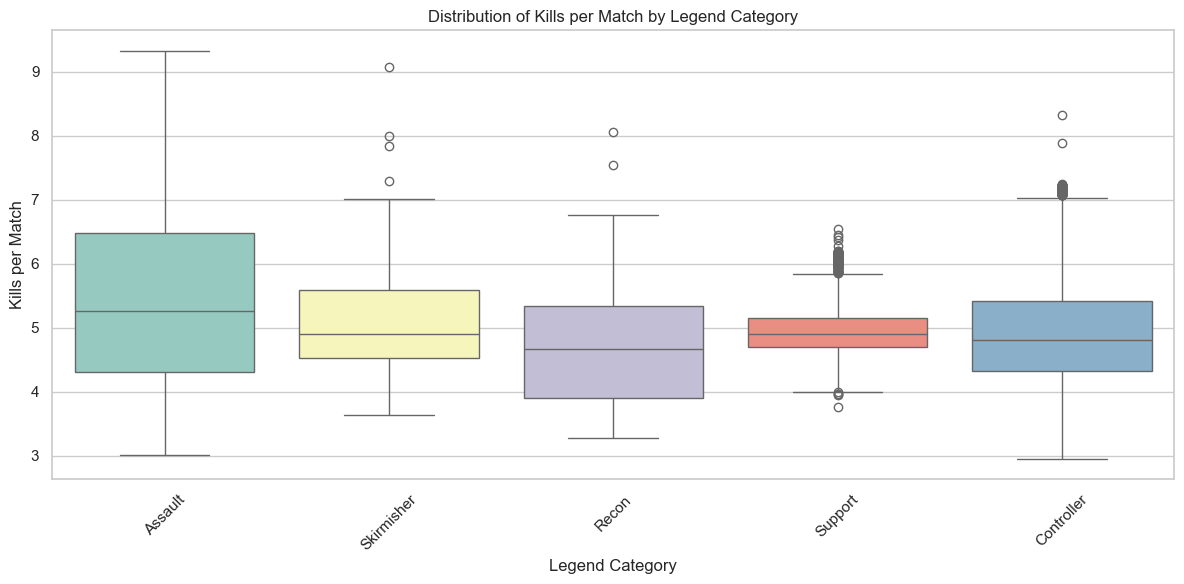

C:\Users\altaa\AppData\Local\Temp\ipykernel_27700\3055534415.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Legend_Category', y='Kills_per_Win', data=filtered_legends_df, palette='Set2')


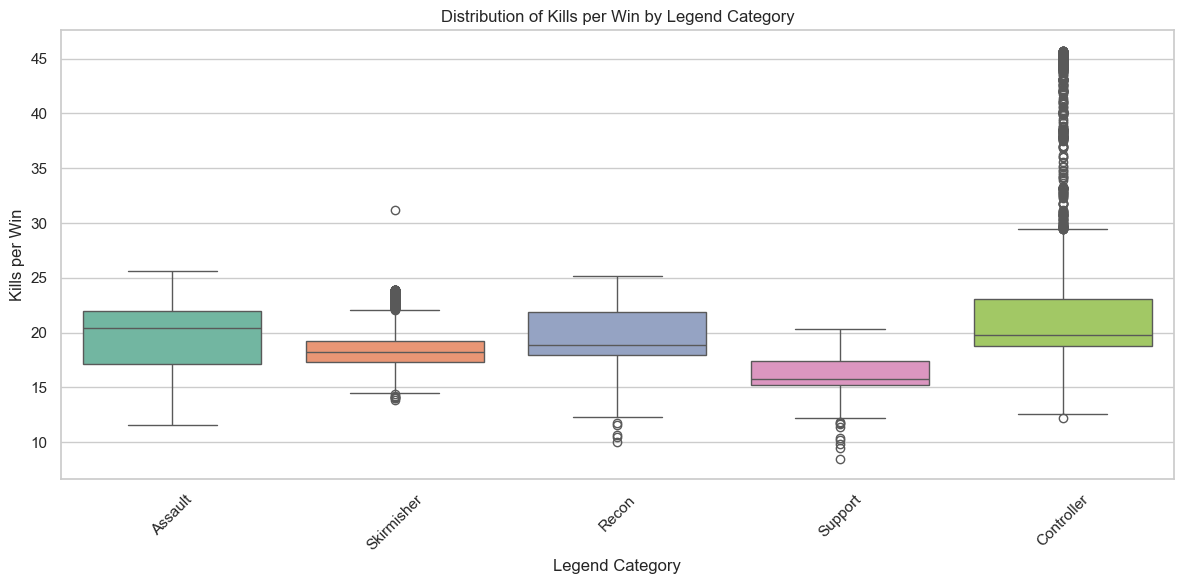

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot for Kills per Match
plt.figure(figsize=(12, 6))
sns.boxplot(x='Legend_Category', y='Kills_per_Match', data=filtered_legends_df, palette='Set3')
plt.title('Distribution of Kills per Match by Legend Category')
plt.xlabel('Legend Category')
plt.ylabel('Kills per Match')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Box Plot for Kills per Win
plt.figure(figsize=(12, 6))
sns.boxplot(x='Legend_Category', y='Kills_per_Win', data=filtered_legends_df, palette='Set2')
plt.title('Distribution of Kills per Win by Legend Category')
plt.xlabel('Legend Category')
plt.ylabel('Kills per Win')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


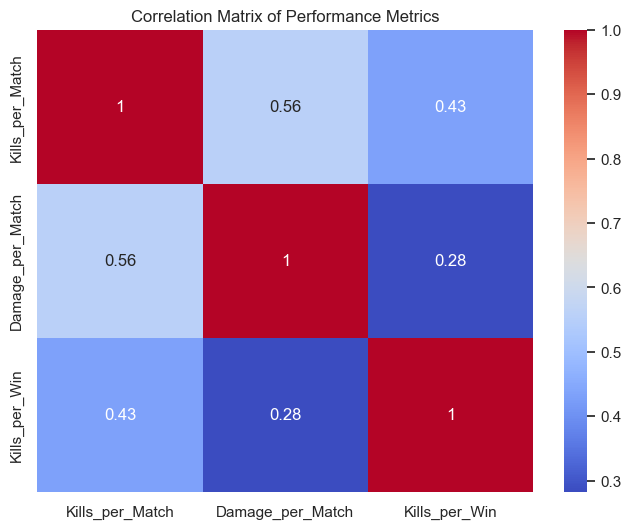

In [139]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_legends_df[['Kills_per_Match', 'Damage_per_Match', 'Kills_per_Win']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()


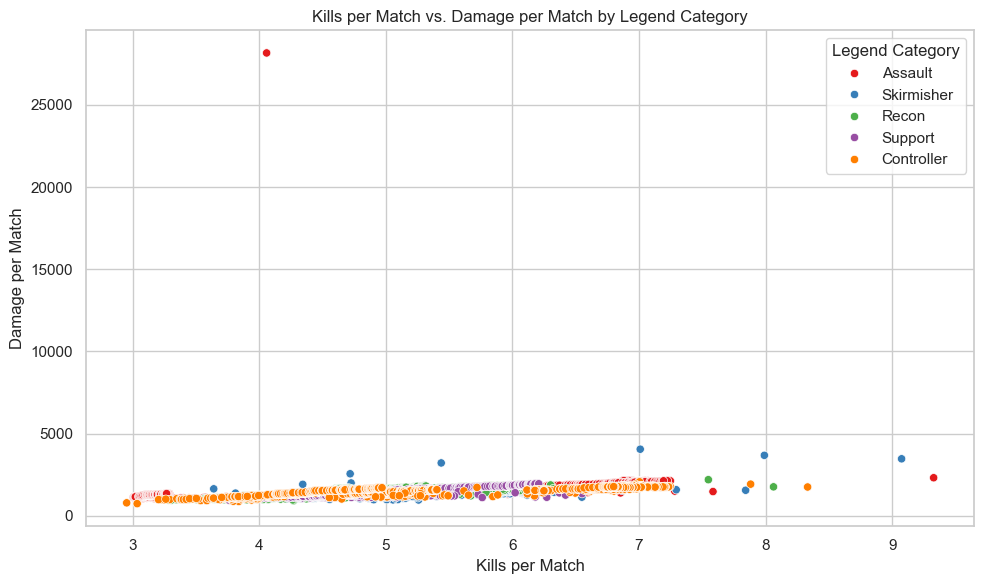

In [140]:
# Kills per Match vs. Damage per Match
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kills_per_Match', y='Damage_per_Match', hue='Legend_Category', data=filtered_legends_df, palette='Set1')
plt.title('Kills per Match vs. Damage per Match by Legend Category')
plt.xlabel('Kills per Match')
plt.ylabel('Damage per Match')
plt.legend(title='Legend Category')
plt.tight_layout()
plt.show()


# ANOVA (Analysis of Variance)

# Post-hoc Tests (Tukey’s HSD)

In [94]:
# Tukey's HSD for Kills per Match
tukey_kpm = pairwise_tukeyhsd(endog=all_legends_df['Kills_per_Match'].dropna(),
                             groups=all_legends_df['Legend_Category'].dropna(),
                             alpha=0.05)
print(tukey_kpm)

# Tukey's HSD for Kills per Win
tukey_kpw = pairwise_tukeyhsd(endog=all_legends_df['Kills_per_Win'].dropna(),
                             groups=all_legends_df['Legend_Category'].dropna(),
                             alpha=0.05)
print(tukey_kpw)


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
   Assault Controller  -0.1997    0.0 -0.2769 -0.1225   True
   Assault      Recon   -0.613    0.0 -0.6902 -0.5358   True
   Assault Skirmisher  -0.2765    0.0  -0.347  -0.206   True
   Assault    Support  -0.3314    0.0 -0.4086 -0.2541   True
Controller      Recon  -0.4133    0.0 -0.4905  -0.336   True
Controller Skirmisher  -0.0768 0.0248 -0.1472 -0.0063   True
Controller    Support  -0.1317    0.0 -0.2089 -0.0544   True
     Recon Skirmisher   0.3365    0.0   0.266   0.407   True
     Recon    Support   0.2816    0.0  0.2044  0.3588   True
Skirmisher    Support  -0.0549 0.2095 -0.1254  0.0156  False
------------------------------------------------------------
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj  lower   upper  reject
--------------------------

# Assumption Checks:

# Normality:

# Use Shapiro-Wilk test or Q-Q plots to assess normality

In [95]:
from scipy.stats import shapiro

# Shapiro-Wilk Test for Kills per Match
stat_kpm, p_kpm = shapiro(all_legends_df['Kills_per_Match'].dropna())
print(f"Shapiro-Wilk Test for Kills per Match: Stat={stat_kpm}, p-value={p_kpm}")

# Shapiro-Wilk Test for Kills per Win
stat_kpw, p_kpw = shapiro(all_legends_df['Kills_per_Win'].dropna())
print(f"Shapiro-Wilk Test for Kills per Win: Stat={stat_kpw}, p-value={p_kpw}")


Shapiro-Wilk Test for Kills per Match: Stat=0.9714869522213909, p-value=5.932868625071963e-42
Shapiro-Wilk Test for Kills per Win: Stat=0.6787885172443497, p-value=1.8469765759231625e-89


C:\Users\altaa\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11000.
  res = hypotest_fun_out(*samples, **kwds)


# Levene’s Test for Homogeneity of Variances:

In [96]:
from scipy.stats import levene

# Levene’s Test for Kills per Match
stat_levene_kpm, p_levene_kpm = levene(*groups_kpm)
print(f"Levene’s Test for Kills per Match: Stat={stat_levene_kpm}, p-value={p_levene_kpm}")

# Levene’s Test for Kills per Win
stat_levene_kpw, p_levene_kpw = levene(*groups_kpw)
print(f"Levene’s Test for Kills per Win: Stat={stat_levene_kpw}, p-value={p_levene_kpw}")


Levene’s Test for Kills per Match: Stat=782.1222639115399, p-value=0.0
Levene’s Test for Kills per Win: Stat=467.99479288805287, p-value=0.0


# Handling Violations

In [97]:
from scipy.stats import kruskal

# Kruskal-Wallis Test for Kills per Match
stat_kw_kpm, p_kw_kpm = kruskal(*groups_kpm)
print(f"Kruskal-Wallis Test for Kills per Match: Stat={stat_kw_kpm}, p-value={p_kw_kpm}")

# Kruskal-Wallis Test for Kills per Win
stat_kw_kpw, p_kw_kpw = kruskal(*groups_kpw)
print(f"Kruskal-Wallis Test for Kills per Win: Stat={stat_kw_kpw}, p-value={p_kw_kpw}")


Kruskal-Wallis Test for Kills per Match: Stat=568.5255556788975, p-value=1.003435082218583e-121
Kruskal-Wallis Test for Kills per Win: Stat=3098.5248287582763, p-value=0.0


# Stats per Legend